In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [5]:
import sgld_tf

In [7]:
smalled = 3000

In [8]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images[:smalled] # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)[:smalled]
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [11]:
directory = '/tmp/tf/sgd_smalled/'

In [10]:
def historical_accuracies(directory, n_points, point_size, stride, method, train_data, train_labels, eval_data, eval_labels):
    data = sgld_tf.ordered_chkpoints_from_dir(directory)
    accuracies = []
    for i in range(n_points):
        print("item ", (i*stride, i*stride + point_size))
        checkpoints = data[i*stride:i*stride+point_size]
        accuracy, _ = sgld_tf.aggregate_predictions(directory,
                                                   checkpoints,
                                                   train_data,
                                                   train_labels,
                                                   eval_data,
                                                   eval_labels,
                                                   method)
        accuracies.append(accuracy)
        
    return accuracies

In [13]:
accuracies = historical_accuracies(directory,
                                   11,
                                   1,
                                   50, 'sgd', train_data, train_labels, eval_data, eval_labels)

item  (0, 1)
item  (50, 51)
item  (100, 101)
item  (150, 151)
item  (200, 201)
item  (250, 251)
item  (300, 301)
item  (350, 351)
item  (400, 401)
item  (450, 451)
item  (500, 501)


In [14]:
sgda_accuracies = historical_accuracies(directory,
                                        10,
                                        50,
                                        50, 'sgd', train_data, train_labels, eval_data, eval_labels)

item  (0, 50)
item  (50, 100)
item  (100, 150)
item  (150, 200)
item  (200, 250)
item  (250, 300)
item  (300, 350)
item  (350, 400)
item  (400, 450)
item  (450, 500)


In [15]:
sgld_accuracies = historical_accuracies('/tmp/tf/sgld_smalled/',
                                        10,
                                        50,
                                        50, 'sgld', train_data, train_labels, eval_data, eval_labels)

item  (0, 50)
item  (50, 100)
item  (100, 150)
item  (150, 200)
item  (200, 250)
item  (250, 300)
item  (300, 350)
item  (350, 400)
item  (400, 450)
item  (450, 500)


In [16]:
psgld_accuracies = historical_accuracies('/tmp/tf/psgld_smalled/',
                                        10,
                                        50,
                                        50, 'psgld', train_data, train_labels, eval_data, eval_labels)

item  (0, 50)
item  (50, 100)
item  (100, 150)
item  (150, 200)
item  (200, 250)
item  (250, 300)
item  (300, 350)
item  (350, 400)
item  (400, 450)
item  (450, 500)


In [17]:
ksgld_accuracies = historical_accuracies('/tmp/tf/ksgld_smalled/',
                                        10,
                                        50,
                                        50, 'ksgld', train_data, train_labels, eval_data, eval_labels)

item  (0, 50)
item  (50, 100)
item  (100, 150)
item  (150, 200)
item  (200, 250)
item  (250, 300)
item  (300, 350)
item  (350, 400)
item  (400, 450)
item  (450, 500)


In [18]:
sglda_accuracies = historical_accuracies('/tmp/tf/sgld_smalled/',
                                        11,
                                        1,
                                        50, 'sgld', train_data, train_labels, eval_data, eval_labels)

item  (0, 1)
item  (50, 51)
item  (100, 101)
item  (150, 151)
item  (200, 201)
item  (250, 251)
item  (300, 301)
item  (350, 351)
item  (400, 401)
item  (450, 451)
item  (500, 501)


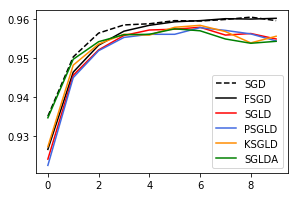

In [30]:
fig, ax1 = plt.subplots(figsize=(4.5,3))
ax1.plot(accuracies[1:], '--', c='black', label='SGD')
ax1.plot(sgda_accuracies[0:], label='FSGD', c='black')
ax1.plot(sgld_accuracies[0:], label='SGLD', c='red')
ax1.plot(psgld_accuracies[0:], label='PSGLD', c='royalblue')
ax1.plot(ksgld_accuracies[0:], label='KSGLD', c='darkorange')

ax1.legend()

/home/henripal/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


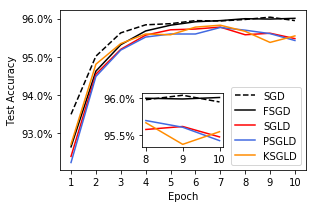

In [27]:
fig, ax1 = plt.subplots(figsize=(4.5,3))
ax1.plot(accuracies[1:], '--', c='black', label='SGD')
ax1.plot(sgda_accuracies[0:], label='FSGD', c='black')
ax1.plot(sgld_accuracies[0:], label='SGLD', c='red')
ax1.plot(psgld_accuracies[0:], label='PSGLD', c='royalblue')
ax1.plot(ksgld_accuracies[0:], label='KSGLD', c='darkorange')

ax1.legend()
#ax1.set_ylim([.93, .965])
ax1.set_xticks(np.arange(0, 10))
ax1.set_xticklabels(np.arange(1, 11))
yticks = ax1.get_yticks()
ax1.set_yticklabels(['{:2.1f}%'.format(x*100) for x in yticks])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Test Accuracy')

l, b, w, h = [.45, .3, .25, .25]
ax2 = fig.add_axes([l, b, w, h])
start_i = 7
ax2.plot(accuracies[start_i+1:], '--', label='SGD', c='black')
ax2.plot(sgda_accuracies[start_i:], label='FSGD', c='black')
ax2.plot(sgld_accuracies[start_i:], label='SGLD', c='red')
ax2.plot(psgld_accuracies[start_i:], label='pSGLD', c='royalblue')
ax2.plot(ksgld_accuracies[start_i:], label='KSGLD', c='darkorange')

yticks2 = ax2.get_yticks()
ax2.set_yticklabels(['{:2.1f}%'.format(x*100) for x in yticks2])

ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels([8, 9, 10])
plt.tight_layout()

plt.savefig('../../overleaf/img/accuracy_small.eps')

In [28]:
print(sgda_accuracies[-1])
print(accuracies[-1])
print(psgld_accuracies[-1])
print(ksgld_accuracies[-1])

0.9601
0.9595
0.9543
0.9555
